#  Predictive Analytics



### Investing in Nashville

Name : Venkata Naga Sai Neeharika Surampudi

# Introduction

This dataset consists of details of about recent sales of growing Nashville area. This dataset consists of  56635 entries.

Here is a brief summary of each feature:

Land Use: Describes the type of land use the property is designated for.
Sale Price: The price at which the property was sold.
Sold As Vacant: Indicates whether anyone was living in the house at the time of sale.
Multiple Parcels Involved in Sale: Indicates whether multiple properties were involved in the sale.
Acreage: The total area of the property in acres.
Tax District: The tax district in which the property is located.
Land Value: The value of the land.
Building Value: The value of the building.
Total Value: The total assessed value of the property.
Finished Area: The total area of the property that is finished.
Foundation Type: The type of foundation on which the building is constructed.
Year Built: The year in which the building was constructed.
Exterior Wall: The material used for exterior walls of the building.
Grade: The overall grade given to the condition of the property.
Bedrooms: The number of bedrooms in the property.
Full Bath: The number of full bathrooms in the property.
Half Bath: The number of half bathrooms in the property.

# Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
housing_data = pd.read_csv("C:/Users/neeha/OneDrive/Documents/Northeastern University Assignmnets/Predictive Analytics/Assignment5/Nashville_housing_data_2013_2016.csv",na_values="?")

# display the first 5 rows of the DataFrame
housing_data.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


#### Task 1:

#### Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

#### Cleaning dataset

In [3]:
# Checking for missing values if any
print("Missing values:\n", housing_data.isnull().sum())

print(housing_data.isna().any().any())

Missing values:
 Unnamed: 0.1                             0
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          

In [4]:
# Dropping all  the irrelavant columns.  
housing_data.drop(['Unnamed: 0.1','Unnamed: 0', 'Parcel ID', 'Legal Reference', 'Owner Name','Address','City','State',
                   'Neighborhood', 'image','Suite/ Condo   #','Property Address','Tax District','Property City'], axis=1, inplace=True)

In [5]:
housing_data.head()

,Land Use,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,2013-01-24,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,2013-01-11,191500,No,No,0.17,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,2013-01-18,202000,No,No,0.11,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,2013-01-18,32000,No,No,0.17,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,2013-01-23,102000,No,No,0.34,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


#### Imputing missing values

In [6]:
#Imputing missing values of bedrooms full bath and half bath with median

cols = ['Bedrooms','Full Bath','Half Bath']
housing_data[cols] = housing_data[cols].fillna(housing_data[cols].median())

In [7]:
#Imputing missing values with mean

housing_data.fillna(housing_data.mean(numeric_only=True),inplace=True)

In [8]:
housing_data.shape

(56636, 17)

In [9]:
# Checking for missing values if any
print("Missing values:\n", housing_data.isnull().sum())

print(housing_data.isna().any().any())

Missing values:
 Land Use                                 0
Sale Date                                0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                                  0
Land Value                               0
Building Value                           0
Total Value                              0
Finished Area                            0
Foundation Type                      32472
Year Built                               0
Exterior Wall                        32471
Grade                                32471
Bedrooms                                 0
Full Bath                                0
Half Bath                                0
dtype: int64
True


we have a huge missing value for columns Foundation Type,Exterior Wall,Grade

In [10]:
# Convert sale date to datetime object and extract year
housing_data['Sale Date'] = pd.to_datetime(housing_data['Sale Date'])
housing_data['Sale Year'] = housing_data['Sale Date'].dt.year
housing_data.drop('Sale Date', axis=1, inplace=True)

In [11]:
from sklearn.impute import SimpleImputer

# identify categorical columns with missing values
categorical_cols = ['Foundation Type','Exterior Wall', 'Grade']

# create a SimpleImputer object with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# impute missing values for categorical columns using SimpleImputer
for col in categorical_cols:
    housing_data[col] = imputer.fit_transform(housing_data[[col]])

# check for missing values again
print("Missing values:\n", housing_data.isnull().sum())

Missing values:
 Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Year                            0
dtype: int64


All the missing values are imputed

In [12]:
#Converting few columns to int
cols = ['Year Built','Bedrooms','Full Bath','Half Bath']
housing_data[cols] = housing_data[cols].astype(int)

In [13]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           56636 non-null  object 
 1   Sale Price                         56636 non-null  int64  
 2   Sold As Vacant                     56636 non-null  object 
 3   Multiple Parcels Involved in Sale  56636 non-null  object 
 4   Acreage                            56636 non-null  float64
 5   Land Value                         56636 non-null  float64
 6   Building Value                     56636 non-null  float64
 7   Total Value                        56636 non-null  float64
 8   Finished Area                      56636 non-null  float64
 9   Foundation Type                    56636 non-null  object 
 10  Year Built                         56636 non-null  int32  
 11  Exterior Wall                      56636 non-null  obj

In [14]:
housing_data.describe()

,Sale Price,Acreage,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year
count,5.663600e+04,56636.000000,5.663600e+04,5.663600e+04,5.663600e+04,56636.000000,56636.000000,56636.000000,56636.000000,56636.000000,56636.000000
mean,3.272111e+05,0.498903,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.319673,3.038403,1.951179,0.121071,2014.595381
std,9.287425e+05,1.064356,7.187034e+04,1.401641e+05,1.904990e+05,1101.971816,17.343730,0.558844,0.632065,0.348154,1.067078
min,5.000000e+01,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,0.000000,1799.000000,0.000000,0.000000,0.000000,2013.000000
25%,1.350000e+05,0.290000,3.020000e+04,1.191000e+05,1.605000e+05,1806.000000,1963.000000,3.000000,2.000000,0.000000,2014.000000
50%,2.054500e+05,0.498903,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.000000,3.000000,2.000000,0.000000,2015.000000
75%,3.290000e+05,0.498903,6.907267e+04,1.608025e+05,2.323971e+05,1926.954345,1963.000000,3.000000,2.000000,0.000000,2015.000000
max,5.427806e+07,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000,2016.000000


In [15]:
# Checking for duplicate values
print("Duplicate rows:\n", housing_data.duplicated().sum())

Duplicate rows:
 18288


we have 18288 duplicate values so, dropping them.

In [16]:
# Droping duplicates based on all columns
housing_data = housing_data.drop_duplicates()

In [17]:
# Creating the dependent variable
housing_data['over_or_under_price'] = np.where(housing_data['Sale Price'] > housing_data['Total Value'], 'Overpriced', 'Underpriced')

#### Data Visualization

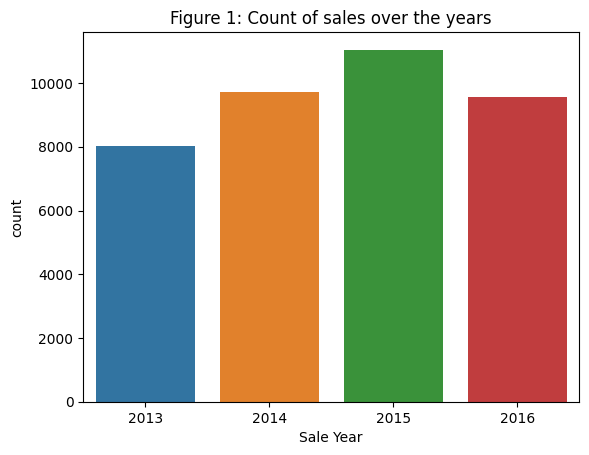

In [18]:
sns.countplot(x='Sale Year', data=housing_data)
plt.title("Figure 1: Count of sales over the years");

From this we got to know that the year 2015 saw the highest number of property sales

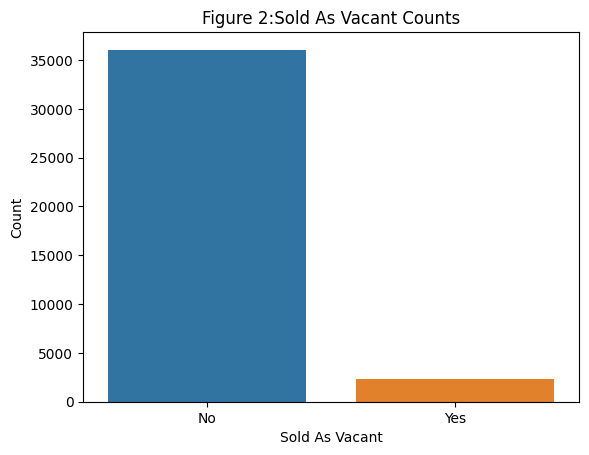

In [19]:
sns.countplot(x='Sold As Vacant', data=housing_data)
plt.title('Figure 2:Sold As Vacant Counts')
plt.xlabel('Sold As Vacant')
plt.ylabel('Count')
plt.show()

from this we got to know that most of the sold properties are not vacant

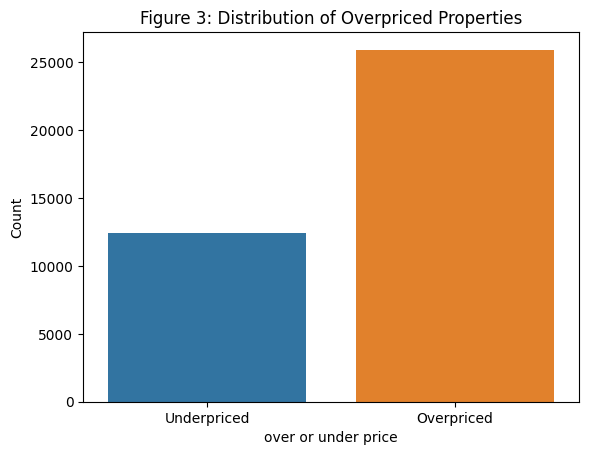

In [20]:
sns.countplot(x="over_or_under_price", data=housing_data)
plt.title("Figure 3: Distribution of Overpriced Properties")
plt.xlabel("over or under price")
plt.ylabel("Count")
plt.show()

In this plot we can see a clear class bias, with a majority of properties that are classified as overpriced being valued above 25000, while the majority of properties classified as underpriced are valued below 15000. This class bias can affect the performance of machine learning models trained on this data, as the models may be biased towards predicting overpriced properties due to the class imbalance. Therefore, it is important to address this class bias in the data preprocessing and modeling steps to ensure fair and accurate predictions.

#### Converting all categorical Variables into binary variables using conditions

In [21]:
#converting and over_or_under_price variables to binary

# Create a new column with 1s for "Overpriced" rows and 0s for "Underpriced" rows
housing_data["overpriced"] = housing_data["over_or_under_price"].apply(lambda x: 1 if x == "Overpriced" else 0)

# Drop the original column
housing_data.drop("over_or_under_price", axis=1, inplace=True)

In [22]:
#converting Sold As Vacant , Multiple Parcels Involved in Sale columns to 0 and 1 
housing_data["Multiple Parcels Involved in Sale"] = housing_data["Multiple Parcels Involved in Sale"].apply(lambda x: 1 if x == "Yes" else 0)
housing_data["Sold As Vacant"] = housing_data["Sold As Vacant"].apply(lambda x: 1 if x == "Yes" else 0)

In [23]:
housing_data = pd.get_dummies(housing_data, columns = ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Exterior Wall', 'Grade','Foundation Type'])

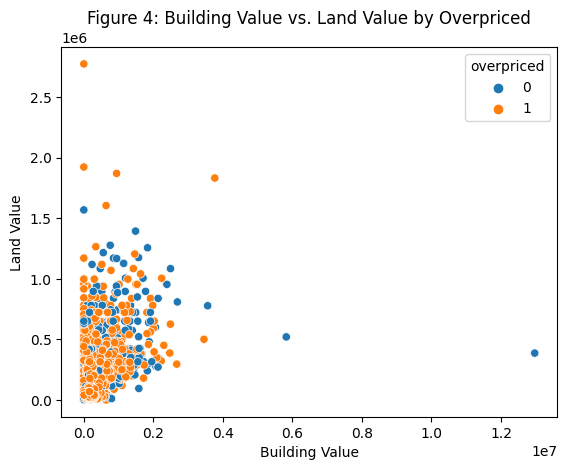

In [24]:
sns.scatterplot(x="Building Value", y="Land Value", hue="overpriced", data=housing_data)
plt.title("Figure 4: Building Value vs. Land Value by Overpriced")
plt.xlabel("Building Value")
plt.ylabel("Land Value")
plt.show()

From the plot, we can see that there is a slightly positive correlation between building value and land value, which makes sense since properties with more valuable buildings are likely to be built on more valuable land.

Additionally, we can see that there are some properties that are labeled as overpriced (shown in orange) that have relatively high building and land values compared to other properties in the dataset. However, there are also some properties that are labeled as not overpriced (shown in blue) that have similarly high building and land values. Therefore, we cannot solely rely on these two variables to determine whether a property is overpriced or not.

In [25]:
housing_data.shape

(38348, 91)

Now all the categorical variables are changed to numerical variables

#### Checking for outliers

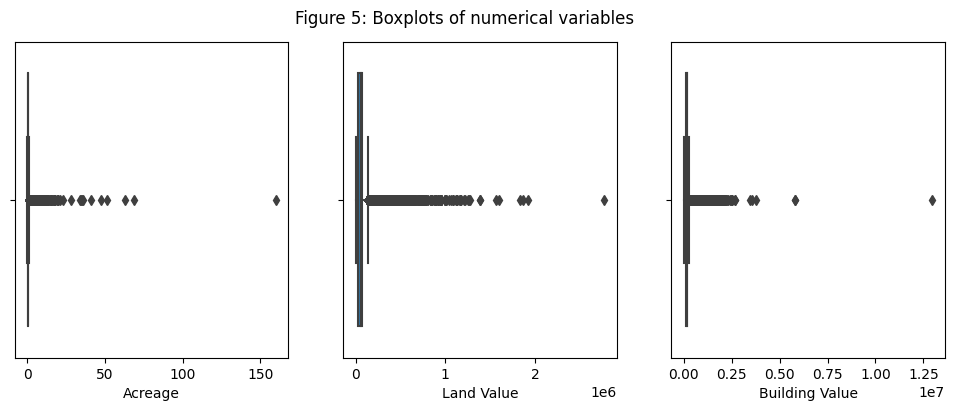

In [26]:
# Creating Box plots for numerical columns to check for outliers
 
numeric_cols = ['Acreage','Land Value','Building Value']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for idx, ax in enumerate(axes.flatten()):
    if idx < len(numeric_cols):
        sns.boxplot(x=pd.Series(housing_data[numeric_cols[idx]]), ax=ax)
        ax.set_xlabel(numeric_cols[idx])
    else:
        ax.set_visible(False)

plt.suptitle("Figure 5: Boxplots of numerical variables")
plt.subplots_adjust(top=0.9, hspace=0.6)
plt.show()

This plot depicts the 'Acreage', 'Land Value', 'Building Value' of the dataset. All these three variables are right skewed and has outliers so that needs to be handled

#### Handling outliers

In [27]:
# Handle outliers by replacing with the mean value

def handle_outliers_with_mean(var):
    mean = housing_data[var].mean()
    q1 = housing_data[var].quantile(0.25)
    q3 = housing_data[var].quantile(0.75)
    iqr = q3 - q1
    housing_data.loc[housing_data[var] < (q1 - 1.5*iqr), var] = mean
    housing_data.loc[housing_data[var] > (q3 + 1.5*iqr), var] = mean

handle_outliers_with_mean('Acreage')
handle_outliers_with_mean('Land Value')
handle_outliers_with_mean('Building Value')

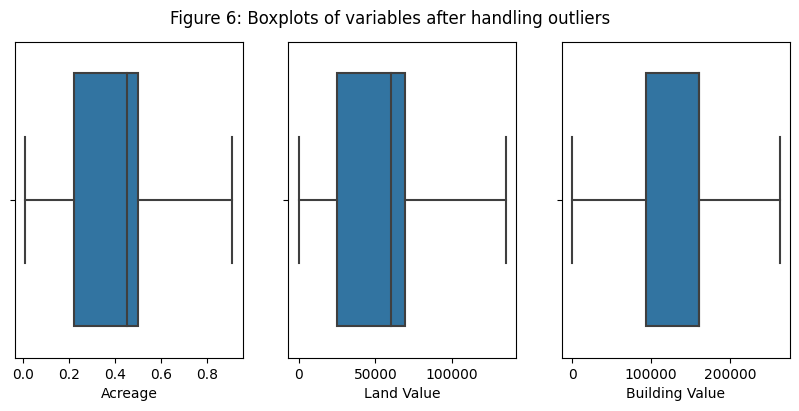

In [28]:
numeric_cols = ['Acreage','Land Value','Building Value']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
for idx, ax in enumerate(axes.flatten()):
    if idx < len(numeric_cols):
        sns.boxplot(x=pd.Series(housing_data[numeric_cols[idx]]), ax=ax)
        ax.set_xlabel(numeric_cols[idx])
    else:
        ax.set_visible(False)

plt.suptitle("Figure 6: Boxplots of variables after handling outliers")
plt.subplots_adjust(top=0.9, hspace=0.6)
plt.show()


outliers are removed and replaced with means of respective columns

#### checking multicollinearity

In [29]:
from sklearn.feature_selection import VarianceThreshold

# Set the threshold for variance
threshold = 0.1

# Select the features with variance higher than the threshold
selector = VarianceThreshold(threshold)
selector.fit_transform(housing_data)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = housing_data.columns[selected_indices]

# Drop the features with variance lower than the threshold
housing_data = housing_data[selected_features]

In [30]:
housing_data.shape

(38348, 17)

In [31]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def check_variance_inflation_factor(X):
    variance_inflation_factor_data = pd.DataFrame()
    variance_inflation_factor_data['Features'] = X.columns
    variance_inflation_factor_data['variance_inflation_factor_data'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # sort the DataFrame by descending VIF values
    vif_sorted = variance_inflation_factor_data.sort_values("variance_inflation_factor_data", ascending=False)
    return(vif_sorted)

In [32]:
vif= check_variance_inflation_factor(housing_data)
print(vif)

                      Features  variance_inflation_factor_data
5                   Year Built                    11316.868910
9                    Sale Year                    11237.344822
6                     Bedrooms                       36.560923
7                    Full Bath                       19.094842
2               Building Value                       12.904291
1                   Land Value                        9.903865
13         Exterior Wall_BRICK                        9.884955
3                  Total Value                        8.309310
15                  Grade_C                           8.246405
4                Finished Area                        7.422005
12      Land Use_SINGLE FAMILY                        6.959680
16       Foundation Type_CRAWL                        5.336098
14         Exterior Wall_FRAME                        3.961553
10                  overpriced                        3.490809
11  Land Use_RESIDENTIAL CONDO                        2

In [33]:
housing_data_filtered = housing_data.drop("Sale Year",axis=1)
housing_data_filtered = housing_data_filtered.drop("Year Built",axis=1)
housing_data_filtered = housing_data_filtered.drop("Bedrooms",axis=1)
housing_data_filtered = housing_data_filtered.drop("Building Value",axis=1)

In [34]:
vif= check_variance_inflation_factor(housing_data_filtered)
print(vif)

                      Features  variance_inflation_factor_data
4                    Full Bath                        9.556490
9          Exterior Wall_BRICK                        8.100422
2                  Total Value                        8.027310
1                   Land Value                        7.725834
3                Finished Area                        7.036006
11                  Grade_C                           6.333573
8       Land Use_SINGLE FAMILY                        5.214862
12       Foundation Type_CRAWL                        4.642873
6                   overpriced                        3.246508
10         Exterior Wall_FRAME                        2.968612
7   Land Use_RESIDENTIAL CONDO                        2.191923
0                   Sale Price                        1.932251
5                    Half Bath                        1.412879


#### Checking Correlation

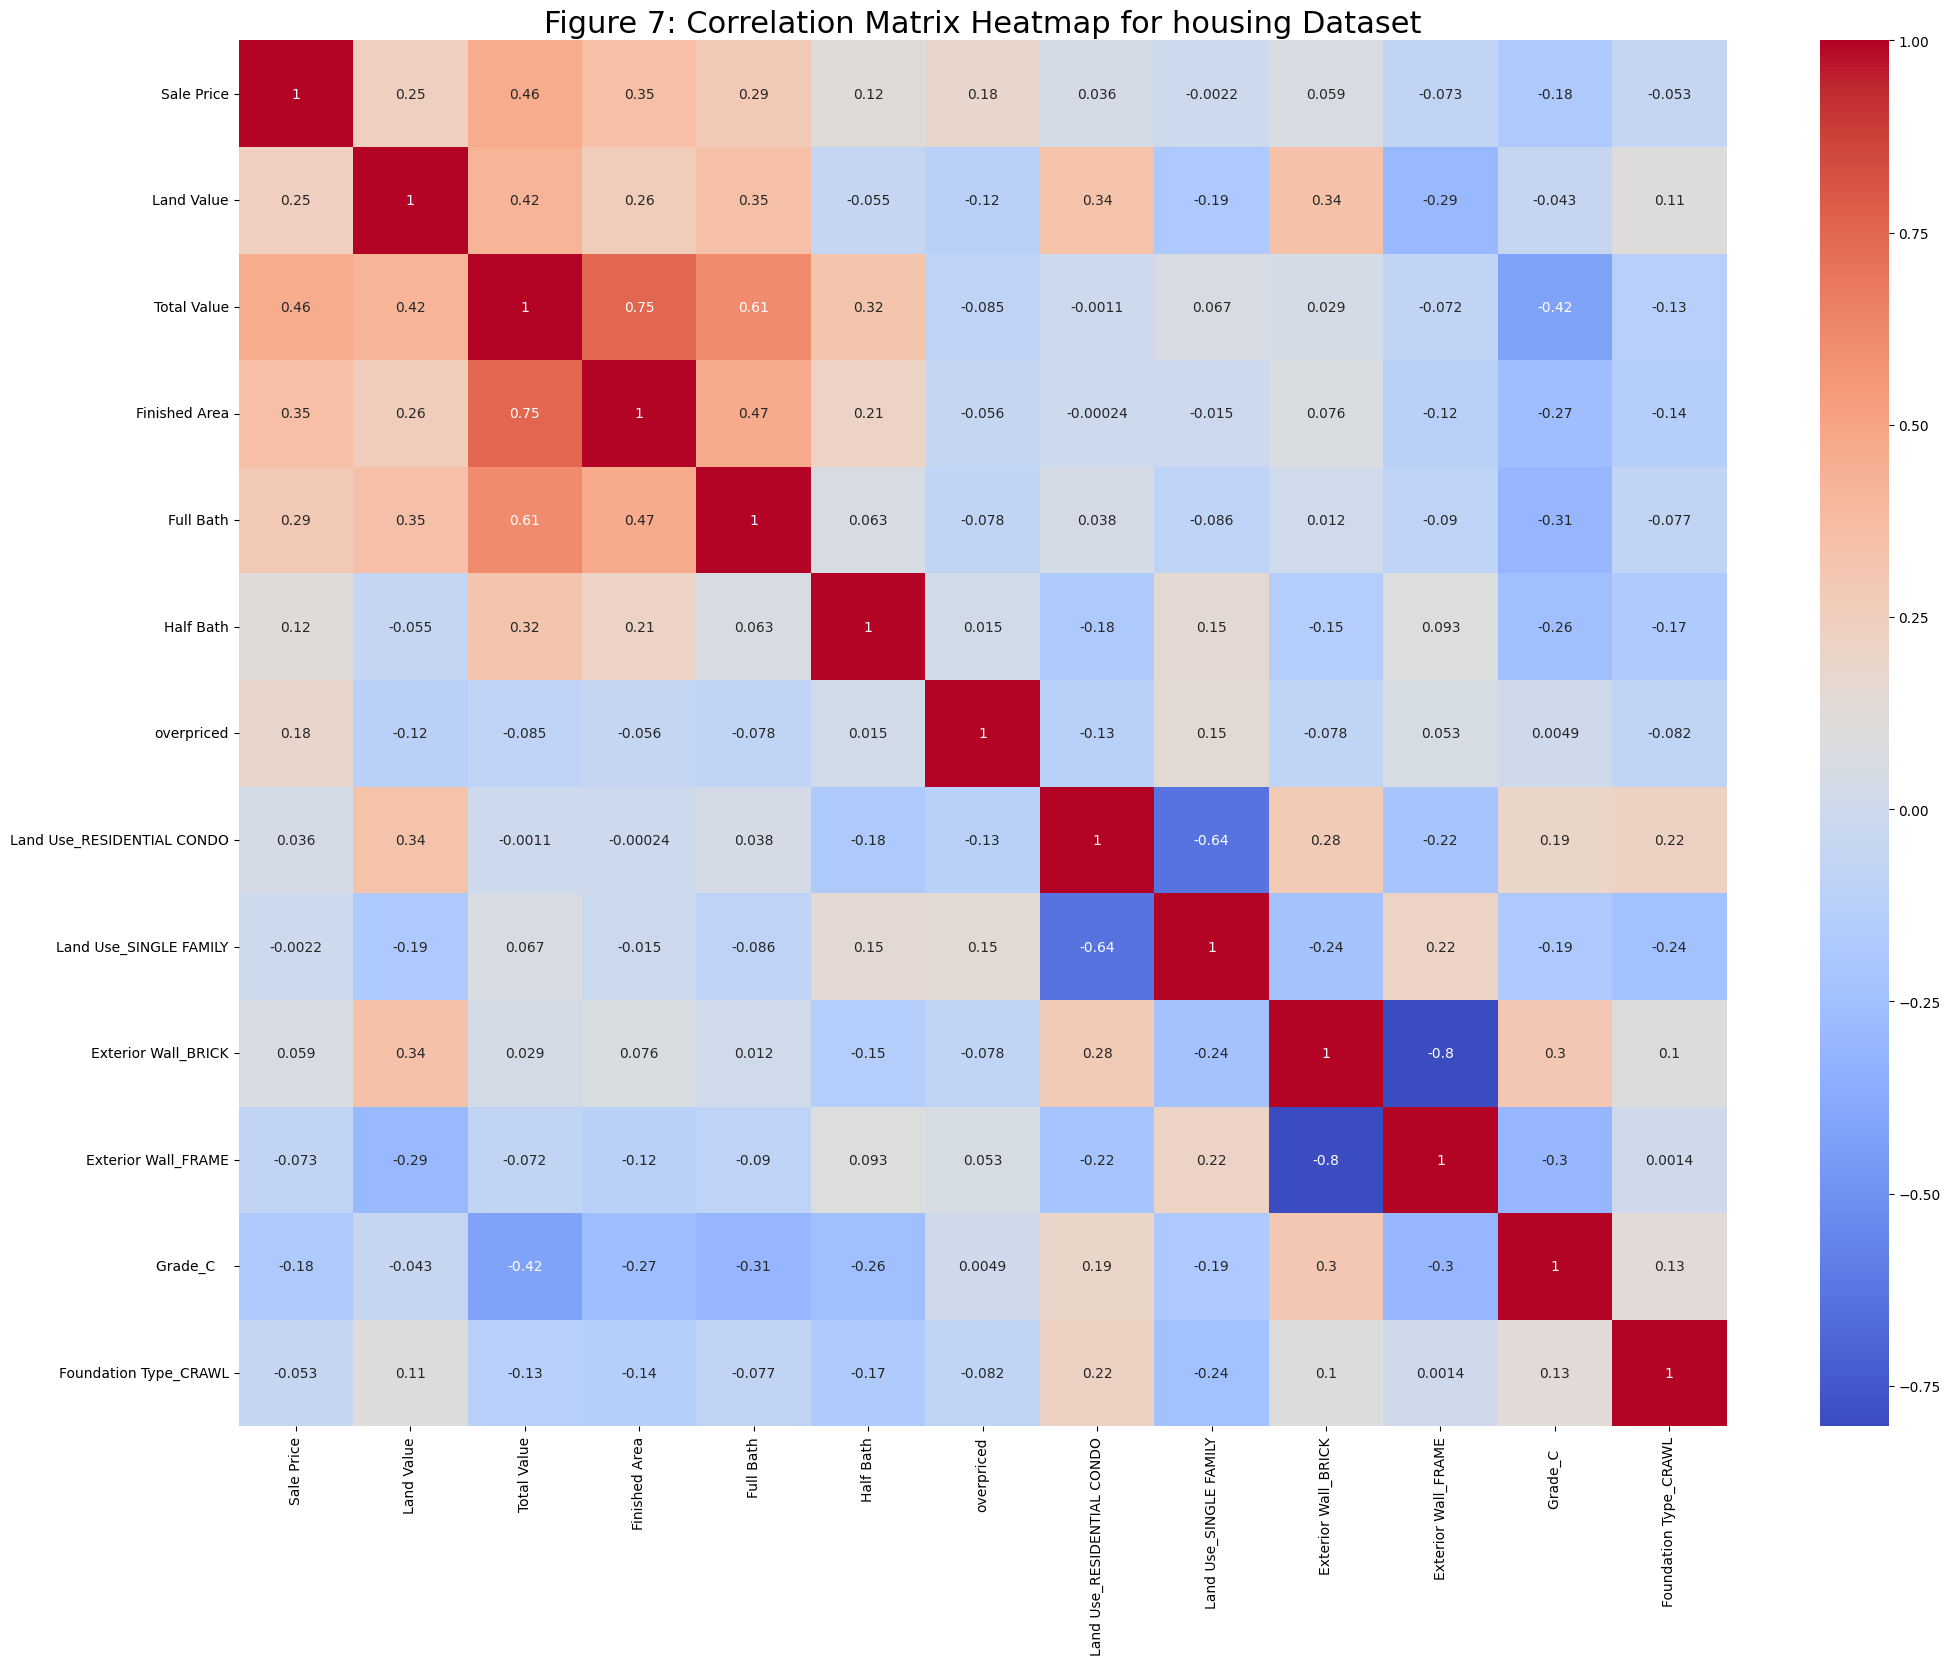

In [35]:
#Correlation using heatmap
plt.figure(figsize = (24, 18))
sns.heatmap(housing_data_filtered.corr(), annot = True, cmap="coolwarm")
plt.title("Figure 7: Correlation Matrix Heatmap for housing Dataset",fontsize=22)
plt.show()

#### Splitting of training and testing data

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
housing_data_train, housing_data_test = train_test_split(housing_data_filtered, train_size = 0.8, test_size = 0.2, random_state = 100)

In [37]:
# Dividing data into X and y variables
y_train = housing_data_train.pop('overpriced')
X_train = housing_data_train

# Dividing data into X and y variables
y_test = housing_data_test.pop('overpriced')
X_test = housing_data_test

#### Normalization of both test and train data

In [38]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

#### Handling class bias with RandomOverSampler

In [39]:
from imblearn.over_sampling import RandomOverSampler

# Create the oversampler object
oversampler = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# check the class distribution after oversampling
print(f"Class distribution of Personal Loan after Oversampling: {np.bincount(y_train_resampled)}")

Class distribution of Personal Loan after Oversampling: [20678 20678]


In [40]:
# Create a DataFrame with feature names
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_train.columns)

#### Task  2:

#### Build a logistic regression model to accurately identify overpricing/underpricing and determine what is driving those prices.

#### Logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

# Create a logistic regression model with regularization
logreg_model = LogisticRegression(penalty='l2', random_state=0, solver='liblinear', C=0.2)

# Fit the model on the training data
result = logreg_model.fit(X_train_resampled, y_train_resampled)

In [42]:
# to get to know more about statistically significant variables fitting the train data with logit

# convert X_train_resampled to a Pandas DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# fit logistic regression model
logit_model = sm.Logit(y_train_resampled, X_train_resampled)
result = logit_model.fit()

# print model summary with feature names
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.339712
         Iterations 9
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.510     
Dependent Variable:     overpriced          AIC:                 28122.2390
Date:                   2023-05-31 17:15    BIC:                 28225.7987
No. Observations:       41356               Log-Likelihood:      -14049.   
Df Model:               11                  LL-Null:             -28666.   
Df Residuals:           41344               LLR p-value:         0.0000    
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         9.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Sale Price       

In [43]:
from prettytable import PrettyTable

# create a dataframe with p-values, feature names and coefficients
p_values = result.pvalues
coefs = result.params
features_df = pd.DataFrame({'p_values': p_values, 'coefs': coefs})
features_df['feature_names'] = features_df.index

# filter dataframe to only include significant p-values
significant_features_df = features_df[features_df['p_values'] < 0.05]

# sort dataframe by ascending p-values
significant_features_df = significant_features_df.sort_values(by=['p_values'], ascending=True)

sig_p = [(X_train.columns[i], result.pvalues[i], result.params[i]) for i in range(len(result.pvalues)) if result.pvalues[i] < 0.05]

# create a pretty table
table = PrettyTable()

# set table column names
table.field_names = ["Feature", "P-Value", "Coefficient"]

# add rows to table
for i in range(3):
    feature_name = sig_p[i][0]
    p_value = sig_p[i][1]
    coefficient = sig_p[i][2]

    table.add_row([feature_name, p_value, coefficient])
table.title = "Top 3 Most Significant variables Results"

# print table
print(table)


+-------------------------------------------------------------+
|           Top 3 Most Significant variables Results          |
+-------------+------------------------+----------------------+
|   Feature   |        P-Value         |     Coefficient      |
+-------------+------------------------+----------------------+
|  Sale Price |          0.0           |  14.423553037607798  |
|  Land Value | 1.3189688577518047e-14 | -0.15982926922128846 |
| Total Value |          0.0           |  -7.738120436857192  |
+-------------+------------------------+----------------------+


In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Evaluate performance on training set
train_acc = accuracy_score(y_train_resampled, logreg_model.predict(X_train_resampled))
print("Training accuracy:", train_acc)

# assign column names to testing dataset
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)


# evaluate performance on testing set
test_acc = accuracy_score(y_test, logreg_model.predict(X_test_scaled))
print("Testing accuracy:", test_acc)

Training accuracy: 0.983726666021859
Testing accuracy: 0.9777053455019556


Logistic regression model is performing well on both the training and testing data, with high accuracies on both. This is a good sign that the model is able to generalize well to new, unseen data.

Accuracy: 0.9777053455019556


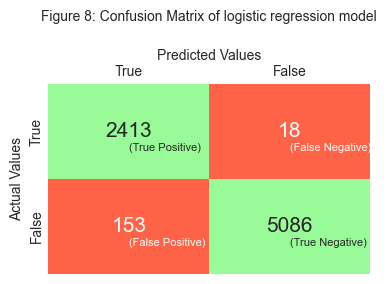

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2431
           1       1.00      0.97      0.98      5239

    accuracy                           0.98      7670
   macro avg       0.97      0.98      0.97      7670
weighted avg       0.98      0.98      0.98      7670



In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

X_train_resampled = X_train_resampled.values

lr_predictions = logreg_model.predict(X_test_scaled)
logreg_model_score = logreg_model.score(X_test_scaled, y_test)

# Compute the metrics for the logistic regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)

print('Accuracy:',lr_accuracy)

confusion_matrix =confusion_matrix(y_test, lr_predictions)
sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=confusion_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Figure 8: Confusion Matrix of logistic regression model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

print(classification_report(y_test, lr_predictions))

The balanced accuracy of the logistic regression model after balancing the class imbalance using SMOTE technique is 0.98.

From the classification report, we can see that the logistic regression model is performing well on the given dataset. It has achieved high precision, recall, and f1-score for both classes (0 and 1) in the test set. The accuracy score of 0.98 indicates that the model is able to correctly classify 98% of the instances in the test set. Overall, these results suggest that the logistic regression model is a good fit for the given dataset and can be used for making predictions.

#### Task 3:

#### Build a decision tree model and compare the results with the results of the previous model.

#### DecisionTree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'max_depth': range(1, 6)}

# Create a decision tree model
tree_model1 = DecisionTreeClassifier(random_state=42)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(tree_model1, param_grid, cv=5)

# Train the model on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

best_max_depth = int(grid_search.best_params_['max_depth'])

# Create a decision tree model with at most 5 branches
tree_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
# Train the model on the training data
tree_model.fit(X_train_resampled, y_train_resampled);

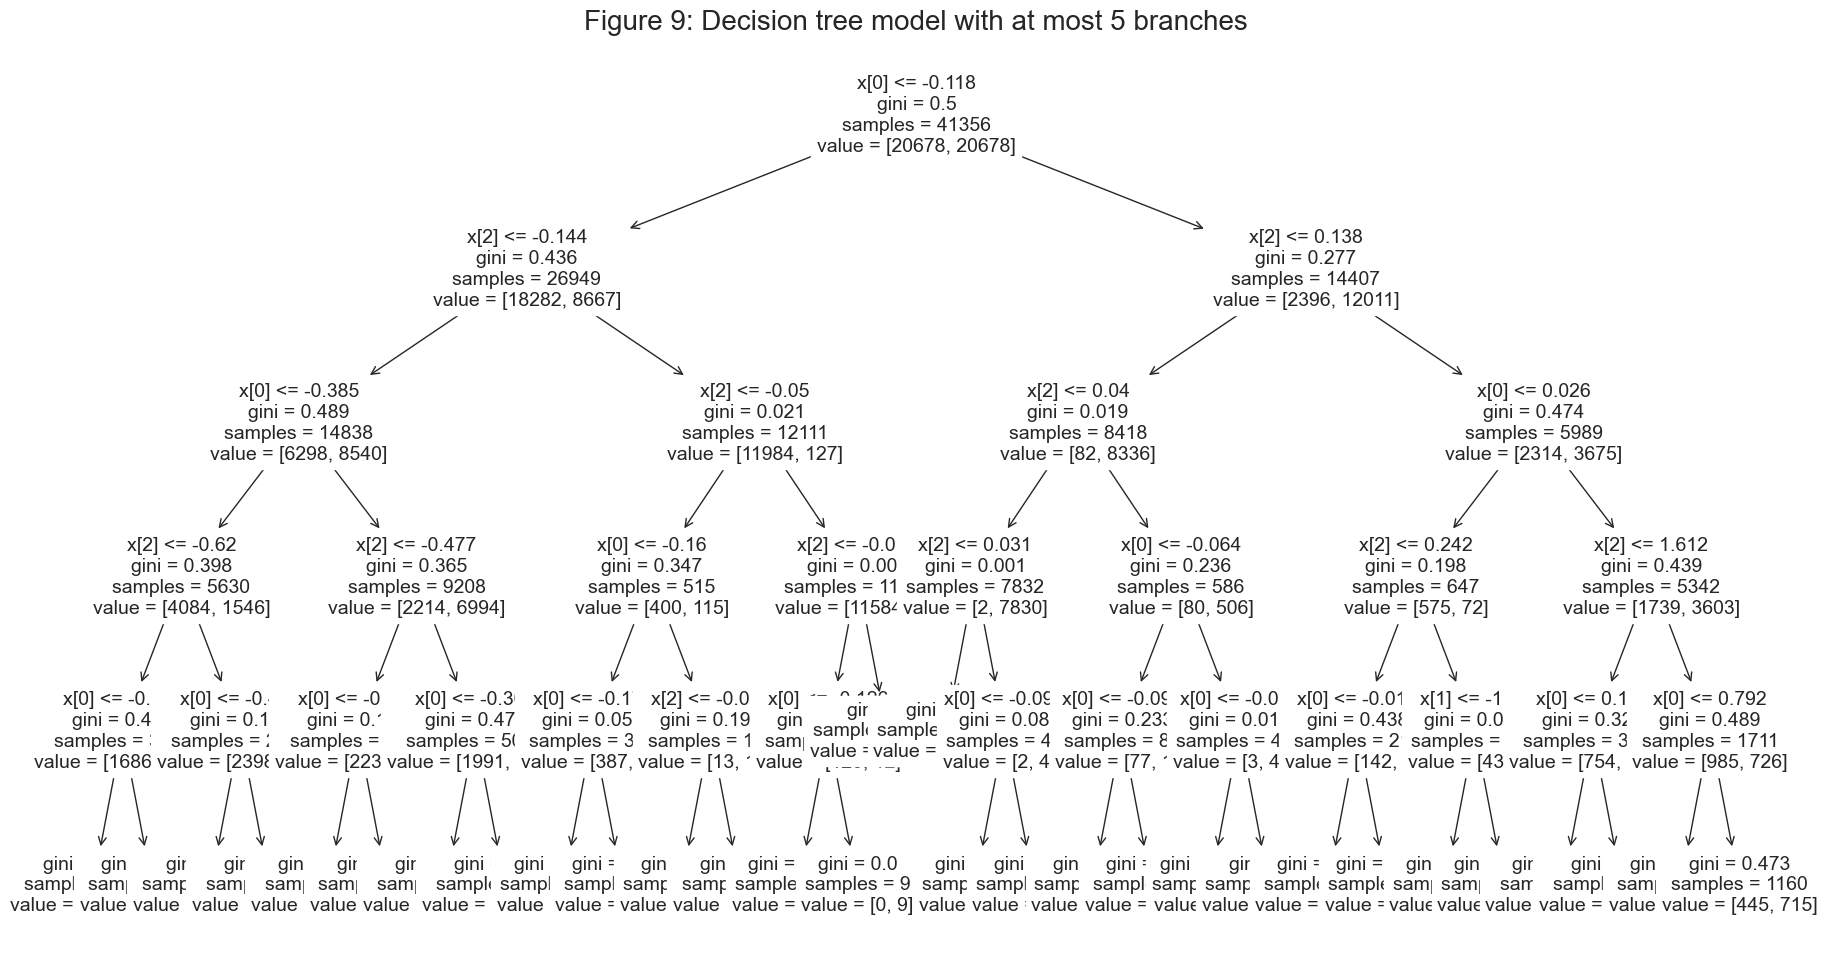

In [47]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(22, 12))
plot_tree(tree_model, ax=ax, fontsize=14)
plt.title("Figure 9: Decision tree model with at most " + str(best_max_depth) + " branches",size=20)
plt.show()



In [48]:
# Evaluate performance on training set
train_acc = accuracy_score(y_train_resampled, tree_model.predict(X_train_resampled))
print("Training accuracy:", train_acc)

# assign column names to testing dataset
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Evaluate performance on testing set
test_acc = accuracy_score(y_test, tree_model.predict(X_test_scaled))
print("Testing accuracy:", test_acc)

Training accuracy: 0.9162153012863913
Testing accuracy: 0.9247718383311604


Based on the results we can see that, the decision tree model has a slightly lower training accuracy of 0.91 compared to the logistic regression model. However, the testing accuracy of the decision tree model is slightly higher at 0.92 compared to the logistic regression model.

Accuracy: 0.9247718383311604


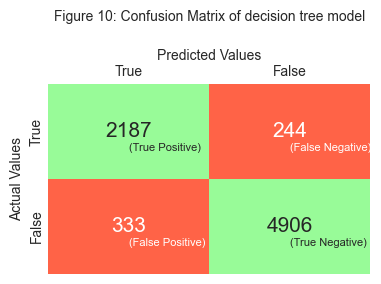

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2431
           1       0.95      0.94      0.94      5239

    accuracy                           0.92      7670
   macro avg       0.91      0.92      0.91      7670
weighted avg       0.93      0.92      0.93      7670



In [49]:
# Make predictions on the test data
DT_predictions = tree_model.predict(X_test_scaled)

# Compute the metrics for the DecisionTreeClassifier
DT_accuracy = accuracy_score(y_test, DT_predictions)
DT_f1 = f1_score(y_test, DT_predictions)
DT_precision = precision_score(y_test, DT_predictions)
DT_recall = recall_score(y_test, DT_predictions)

print("Accuracy:", DT_accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, DT_predictions)
sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=confusion_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Figure 10: Confusion Matrix of decision tree model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

print(classification_report(y_test, DT_predictions))

In [50]:
from tabulate import tabulate
headers = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
table = [['Logistic Regression', round(lr_accuracy, 3), round(lr_f1, 3), round(lr_precision, 3), round(lr_recall, 3)],
         ['Decision Tree', round(DT_accuracy, 3), round(DT_f1, 3), round(DT_precision, 3), round(DT_recall, 3)]]
print('\033[1m' + '**Comparison of Models**\n' + '\033[0m')
print(tabulate(table, headers=headers))

**Comparison of Models**

Model                  Accuracy    F1 Score    Precision    Recall
-------------------  ----------  ----------  -----------  --------
Logistic Regression       0.978       0.983        0.996     0.971
Decision Tree             0.925       0.944        0.953     0.936


#### Task 4:

#### Build a Random Forest model and compare the results with the results of the previous models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model with regularization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=4,max_depth=9)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
# Fit the model on the training data
rf_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Evaluate performance on training set
train_acc = accuracy_score(y_train_resampled, rf_model.predict(X_train_resampled))
print("Training accuracy:", train_acc)

# Evaluate performance on testing set
test_acc = accuracy_score(y_test, rf_model.predict(X_test_scaled))
print("Testing accuracy:", test_acc)

Here the training accuracy is slightly higher than the testing accuracy but there is no much difference as I applied regularization while building the model to prevent overfitting

In [ ]:
# Make predictions on the test data
RF_predictions = rf_model.predict(X_test_scaled)
# Compute the metrics for the DecisionTreeClassifier
RF_accuracy = accuracy_score(y_test, RF_predictions)
RF_f1 = f1_score(y_test, RF_predictions)
RF_precision = precision_score(y_test, RF_predictions)
RF_recall = recall_score(y_test, RF_predictions)


print("Accuracy:", RF_accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, RF_predictions)

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=confusion_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Figure 11: Confusion Matrix of Random forest model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

print("Accuracy:", RF_accuracy)

print(classification_report(y_test, RF_predictions))


In [ ]:
from tabulate import tabulate
headers = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
table = [['Logistic Regression', round(lr_accuracy, 3), round(lr_f1, 3), round(lr_precision, 3), round(lr_recall, 3)],
         ['Decision Tree', round(DT_accuracy, 3), round(DT_f1, 3), round(DT_precision, 3), round(DT_recall, 3)],
         ['Random Forest', round(RF_accuracy, 3), round(RF_f1, 3), round(RF_precision, 3), round(RF_recall, 3)]]
print('\033[1m' + '**Comparison of Models**\n' + '\033[0m')
print(tabulate(table, headers=headers))

#### Task 5:

#### Build a Gradient Boost model and compare the results with the results of the previous models.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Build the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Evaluate performance on training set
train_acc = accuracy_score(y_train_resampled, gb_model.predict(X_train_resampled))
print("Training accuracy:", train_acc)

# Evaluate performance on testing set
test_acc = accuracy_score(y_test, gb_model.predict(X_test_scaled))
print("Testing accuracy:", test_acc)

for the gradient boost model there is no much difference between testing and training accuracy 

In [ ]:
# Make predictions on the test data
GB_predictions = gb_model.predict(X_test_scaled)
# Compute the metrics for the DecisionTreeClassifier
GB_accuracy = accuracy_score(y_test, GB_predictions)
GB_f1 = f1_score(y_test, GB_predictions)
GB_precision = precision_score(y_test, GB_predictions)
GB_recall = recall_score(y_test, GB_predictions)

# Get the confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, GB_predictions)

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=confusion_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Figure 12: Confusion Matrix of Gradient Boost model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

print("Accuracy:",GB_accuracy)

print(classification_report(y_test, GB_predictions))

In [ ]:
from tabulate import tabulate
headers = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
table = [['Logistic Regression', round(lr_accuracy, 3), round(lr_f1, 3), round(lr_precision, 3), round(lr_recall, 3)],
         ['Decision Tree', round(DT_accuracy, 3), round(DT_f1, 3), round(DT_precision, 3), round(DT_recall, 3)],
         ['Random Forest', round(RF_accuracy, 3), round(RF_f1, 3), round(RF_precision, 3), round(RF_recall, 3)],
        ['Gradient Boost', round(GB_accuracy, 3), round(GB_f1, 3), round(GB_precision, 3), round(GB_recall, 3)]]
print('\033[1m' + '**Comparison of Models**\n' + '\033[0m')
print(tabulate(table, headers=headers))

#### Task 6:

#### Build a Neural Network model and compare the results with those of the previous model.

In [ ]:
from sklearn.neural_network import MLPClassifier

# define the MLPClassifier model with desired hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=1000, random_state=42)
# train the model on the training data
mlp_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Evaluate performance on training set
train_acc = accuracy_score(y_train_resampled, mlp_model.predict(X_train_resampled))
print("Training accuracy:", train_acc)

# Evaluate performance on testing set
test_acc = accuracy_score(y_test, mlp_model.predict(X_test_scaled))
print("Testing accuracy:", test_acc)

As we can see that the testing and training accuracy of Nueral networks model is hight compared to remaining models

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the test data
NN_predictions = mlp_model.predict(X_test_scaled)

# Calculate accuracy, f1 score, precision, and recall
NN_accuracy = accuracy_score(y_test, NN_predictions)
NN_f1 = f1_score(y_test, NN_predictions)
NN_precision = precision_score(y_test, NN_predictions)
NN_recall = recall_score(y_test, NN_predictions)

# Get the confusion matrix for the neural network model
cf_matrix = confusion_matrix(y_test, NN_predictions)

# Get the confusion matrix

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(np.eye(2), annot=cf_matrix, fmt='g', annot_kws={'size': 15},
            cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False,
            yticklabels=['True', 'False'], xticklabels=['True', 'False'], ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)

ax.set_title('Figure 13: Confusion Matrix of Gradient Boost model', size=10, pad=20)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
for text_elt, additional_text in zip(ax.texts, additional_texts):
    ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(), va='top', size=8)
plt.tight_layout()
plt.show()

print("Accuracy:",NN_accuracy)

# Print the classification report for the neural network model
print(classification_report(y_test, NN_predictions))

In [ ]:
from tabulate import tabulate
headers = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
table = [['Logistic Regression', round(lr_accuracy, 3), round(lr_f1, 3), round(lr_precision, 3), round(lr_recall, 3)],
         ['Decision Tree', round(DT_accuracy, 3), round(DT_f1, 3), round(DT_precision, 3), round(DT_recall, 3)],
         ['Random Forest', round(RF_accuracy, 3), round(RF_f1, 3), round(RF_precision, 3), round(RF_recall, 3)],
        ['Gradient Boost', round(GB_accuracy, 3), round(GB_f1, 3), round(GB_precision, 3), round(GB_recall, 3)],
        ['Neural Networks', round(NN_accuracy, 3), round(NN_f1, 3), round(NN_precision, 3), round(NN_recall, 3)]]
print('\033[1m' + '**Comparison of Models**\n' + '\033[0m')
print(tabulate(table, headers=headers))

Based on the comparison of the models, it appears that the neural network model has the highest accuracy, F1 score, precision, and recall, followed closely by the logistic regression and gradient boost models. The decision tree and random forest models have slightly lower accuracy and F1 scores, but still perform well.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities for testing data
probs_lr = logreg_model.predict_proba(X_test_scaled)
probs_lr = probs_lr[:, 1]

probs_dt = tree_model.predict_proba(X_test_scaled)
probs_dt = probs_dt[:, 1]

RF_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
RF_predictions = (RF_probs > 0.5).astype(int)

probs_gb = gb_model.predict_proba(X_test_scaled)
probs_gb = probs_gb[:, 1]

# Get predicted probabilities for Neural Network model
probs_nn = mlp_model.predict_proba(X_test_scaled)
probs_nn = np.argmax(probs_nn, axis=1)

# calculate ROC curve and AUC score for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)
auc_lr = roc_auc_score(y_test, probs_lr)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)
auc_dt = roc_auc_score(y_test, probs_dt)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, RF_probs)
auc_rf = roc_auc_score(y_test, RF_probs)

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)
auc_gb = roc_auc_score(y_test, probs_gb)

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, probs_nn)
auc_nn = roc_auc_score(y_test, probs_nn)

# plot ROC curves
plt.plot(fpr_lr, tpr_lr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_dt, tpr_dt, linestyle='--', label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot(fpr_rf, tpr_rf, linestyle='--', label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_gb, tpr_gb, linestyle='--', label='Gradient Boosting (AUC = %0.2f)' % auc_gb)
plt.plot(fpr_nn, tpr_nn, linestyle='--', label='Neural Network (AUC = %0.2f)' % auc_nn)

# plot random line for reference
plt.plot([0, 1], [0, 1], linestyle='--', label='Reference')

# set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 14: Receiver Operating Characteristic (ROC) Curve')

# add legend
plt.legend()

# show plot
plt.show()

#### Task 7:

#### Use multiple benchmarking metrics to compare and contrast the five models. Based on your findings, provide evidence of which model you believe the real estate company should use and what are the key variables to focus on to drive value and how can they get the most value out of the houses they should be targeting.

#### Remember the goal is to help the company make money and solve the problem of what variables to consider in good value properties, building an accurate model doesn't guarantee more money.

#### Top key variables based on Neural Networks Model

In [ ]:
# Get feature importances and sort them in descending order
importances = np.abs(mlp_model.coefs_[0]).mean(axis=1)
feature_names = X_train.columns.values
indices = np.argsort(importances)[::-1]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 5))
plt.title("Figure 15:Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
importances = np.abs(mlp_model.coefs_[0]).mean(axis=1)
feature_names = X_train.columns.values
indices = np.argsort(importances)[::-1]

top_features = feature_names[indices][:3]
print("Top 3 features: ", top_features)

# Conclusion

Based on the benchmarking metrics used, the Neural Networks model performed the best out of all the models with an accuracy of 0.995, F1 score of 0.996, precision of 0.997, and recall of 0.995. This indicates that the Neural Networks model is the most accurate in predicting whether a property is overpriced or underpriced after balancing the data using SMOTE technique.

The top three key variables that drive value in predicting a good value property are 'Sale Price', 'Total Value', and 'Land Use_RESIDENTIAL CONDO'. These features indicate that properties with higher sale prices, total values, and residential condos are more likely to be good value properties.

To get the most value out of the houses they should be targeting, the real estate company should focus on acquiring properties that have high sale prices, total values, and residential condos. They can also use the Neural Networks model to predict whether a property is overprice or underprice, which can help them make more informed investment decisions and potentially increase their profits.

# Reference

Randomoversampler#. RandomOverSampler - Version 0.10.1. (n.d.). Retrieved May 14, 2023, from https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html 

Sklearn.linear_model.logisticregression. scikit. (n.d.). Retrieved May 14, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

Sklearn.tree.plot_tree. scikit. (n.d.). Retrieved May 14, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html 

Sklearn.neural_network.MLPClassifier. scikit. (n.d.-e).Retrieved May 14, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 